# Project Overview

The purpose of analyzing the dataset from the Center for Innovation and Research is to see if any trends can be uncovered in this data, more specifically relating to new registrations of voters month by month in 2 of the more recent presidential election years. The goal of analyzing this data is to determine if there are months where new voters are registering in greater numbers. This could be important for determining when to push certain advertisments for candidates, or when to publish guides on voter registration to maximize engagement (potentially for ad revenue).

# Preliminary Comments and Research Questions

### National Research Question:
#### Which month sees the most new voters registering? Are there any major events that month that could boost registration?

---
### State Research Question:
####  How did voter registration change between 2016 and 2020 in the District of Columbia?

*The District of Columbia will be refered to as Washington, DC for most of this notebook.*


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [ ]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

# Basics of the Data

**The code in this section serves to verify the lack of missing data, and set up the dataset for easier analysis**

In [ ]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


**Explanation of the Variables**

*Jurisdiction/NAME* : The name of the state/district that the registered voters are in

*Year* : The year that the voters registered in

*Month* : The month that the voters registered in

*New registered voters/registered_voters* : The number of new voting registrations

In [ ]:
voters.isnull().values.any()

False

The above code returning false as the result indicates that the data contains no errors or missing data that needs to be removed.

In [ ]:
voters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Jurisdiction           106 non-null    object
 1   Year                   106 non-null    int64 
 2   Month                  106 non-null    object
 3   New registered voters  106 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 3.4+ KB


The above code verifies that no data types need to be converted, all numerical variables are in the correct form of int64.

In [ ]:
voters=voters.rename(columns={"Jurisdiction":"NAME","New registered voters":"registered_voters"})

### Limitations of the dataset


*   There are only 4 variables, which is very limiting in terms of possible resarch
*   Not all 50 states are included; in fact the data only includes 12, one of which is not a US state, but rather a district
* There is no per capita registration, which further limits the conclusions we can draw. For example, Delaware has around 1/40th the population of California. With this data alone we can only see there are less new voters in Delaware than California, but not the number of new registrations proportional to the populations of the states.



# Preliminary Data Analysis

### The purpose of the code in this section of the notebook, Preliminary Data Analysis, is to get a baseline understanding of the data available, including maximums, minimums, and averages.

In [ ]:
voters.sort_values(by = "registered_voters", ascending = False).head(1)

,NAME,Year,Month,registered_voters
13,California,2020,Feb,238281


This indicates that out of all of our data, California had the most new registrations in February of 2020.

In [ ]:
voters.sort_values(by = "registered_voters", ascending=True).head(1)

,NAME,Year,Month,registered_voters
31,Delaware,2020,Apr,589


The code above shows that Delaware in April of 2020 had the lowest amount of new voter registrations out of all of the data. However, this is misleading, because it implies a low level of political involvement in Delaware without knowledge of rough US populaation numbers.

In [ ]:
voters.registered_voters.mean()

48223.46226415094

The above code produced the mean number of new registered voters, across all available states at all times. This mean is *48223.4623...* , indicating that across our available data, the average amount of registrations per month/year/region was around 48200.






In [ ]:
high_voters=voters.loc[voters.registered_voters >= voters.registered_voters.mean()]

In [ ]:
high_voters.groupby("NAME")["registered_voters"].count().sort_values(ascending=True)

,registered_voters
NAME,
Georgia,1
Arizona,3
Illinois,4
North Carolina,6
California,7
Florida,7
Texas,8


The code above shows us that in total, there are 36 instances spread across 7 states of voter registration being above average in our data. Most of these instances are in larger states, which would make sense since the registration numbers are in total number of registrations, not registrations per 1000 residents.

In [ ]:
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False).head(3)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


The above output shows us that the states with the highest average voters are California, Texas, and Florida. This would again make sense because those are the three most populus states according to the United States Census Bureau.

Source: https://www.census.gov/popclock/

# Broad Data Visualization

In [ ]:
labels = ["Arizona", "California", "Colorado", "Delaware", "Washington, DC","Florida","Georgia","Illinois","Maryland","N. Carolina","Texas","Virginia"]

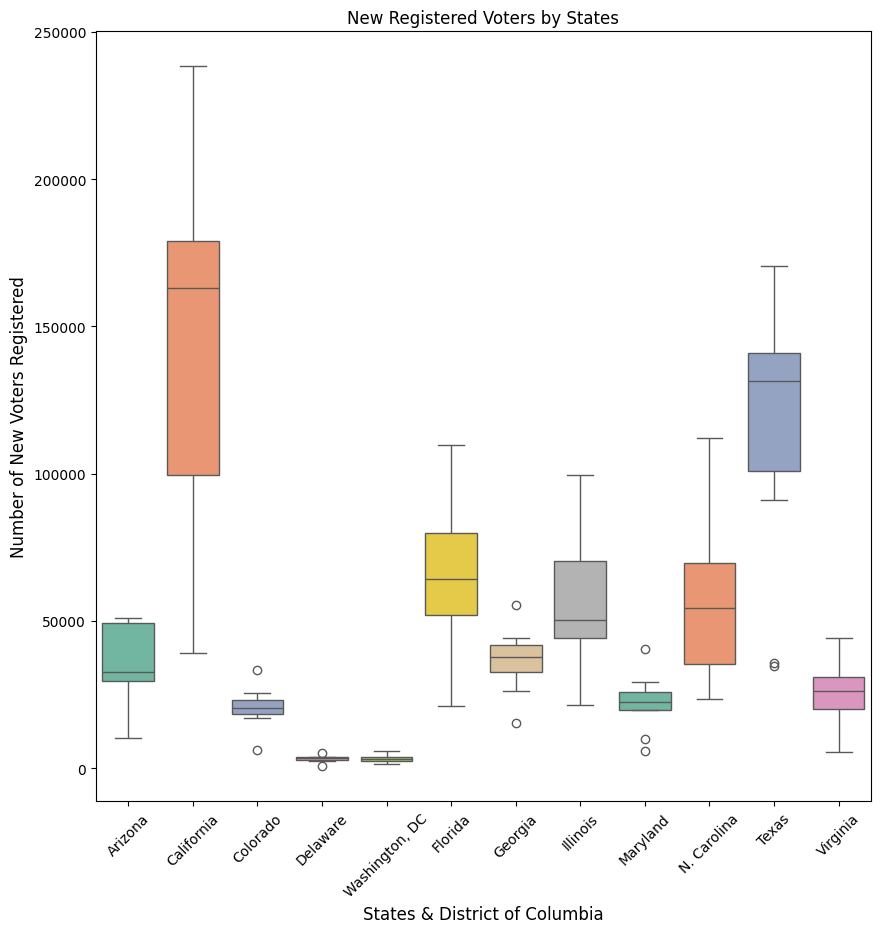

In [ ]:
fig = plt.figure(1,figsize=(10,10))
ax=fig.add_subplot()
sns.boxplot(voters, x="NAME", y="registered_voters", hue="NAME", palette="Set2",ax=ax)
plt.xticks(ticks = range(len(labels)), labels= labels, rotation = 45, fontsize=10)
plt.xlabel("States & District of Columbia", fontsize=12)
plt.ylabel("Number of New Voters Registered", fontsize=12)
plt.title("New Registered Voters by States")
plt.show()

The above graph shows that California, Texas, and Florida are the states with the most new voter registrations in the time available in our data. It also shows us that not all states have an equal distribution within their ranges; in particular, California and Texas are heavily skewed left, while Azirona and Illinois are skewed right. In California we can see how, while there is a wide range of total registrations per month over the available periods, they tend to be towards the higher end (the same is true for Texas).

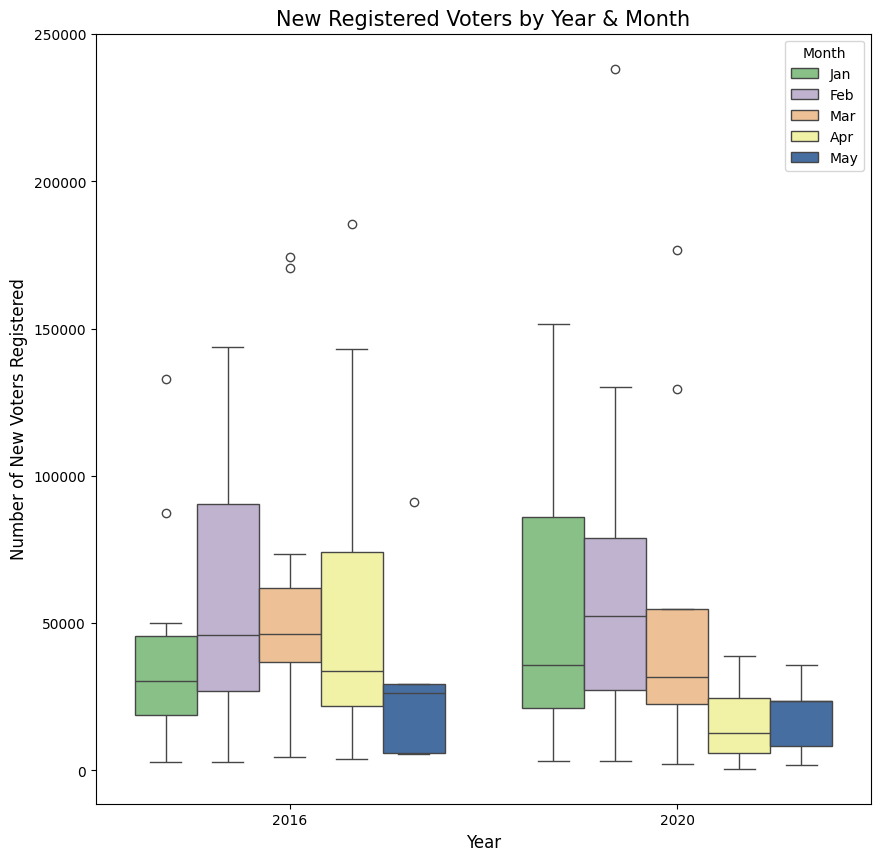

In [ ]:
fig = plt.figure(1,figsize=(10,10))
ax=fig.add_subplot()
sns.boxplot(voters, x="Year",y="registered_voters", hue="Month", palette="Accent")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of New Voters Registered", fontsize=12)
plt.title("New Registered Voters by Year & Month", fontsize=15)
plt.show()

The above graph shows the total voter registrations per month split between the two presidential election years. One of the most apparent differences between the two years is the steep drop off of new registrations in April and May of 2020, potentially due to the COVID-19 associated lockdowns.

# Washington DC Analysis

**How has Washington DC voter registration changed between 2016 and 2020, comparing month by month?**

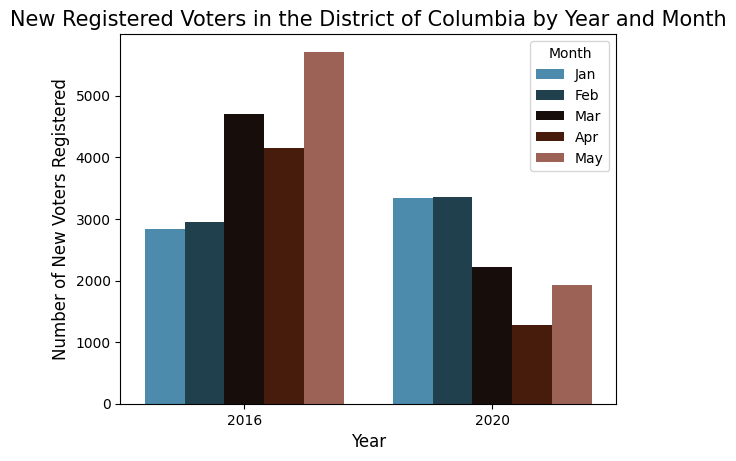

In [ ]:
sns.barplot(voters.loc[voters.NAME=="District of Columbia"], x="Year", y="registered_voters",hue="Month", palette="berlin")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of New Voters Registered", fontsize=12)
plt.title("New Registered Voters in the District of Columbia by Year and Month",fontsize=15)
plt.show()

With the above graph we can see that for the months of January and February voter registration is roughly equivalent between 2016 and 2020. However, from the months March through May, there is a steep drop off in voter registration, most likely due to the COVID-19 lockdowns, although this data alone is not enough to conclude that. The code below shows that in April voter registration dropped by almost 3000 between 2016 and 2020, while May registration dropped by almost 4000.

In [ ]:
voters.loc[voters.NAME=="District of Columbia"].loc[voters.Month=="Apr"].head(2)

,NAME,Year,Month,registered_voters
35,District of Columbia,2016,Apr,4157
40,District of Columbia,2020,Apr,1281


In [ ]:
voters.loc[voters.NAME=="District of Columbia"].loc[voters.Month=="May"].head(2)

,NAME,Year,Month,registered_voters
36,District of Columbia,2016,May,5714
41,District of Columbia,2020,May,1925


# Mapping the Data

In [ ]:
!git clone https://github.com/SFord87/325-Datasets


Cloning into '325-Datasets'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 53 (delta 13), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 7.37 MiB | 10.97 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

In [ ]:
states.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,28,01779790,0400000US28,28,MS,Mississippi,00,121533519481,3926919758,"MULTIPOLYGON (((-88.50297 30.21524, -88.49176 ..."
1,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ..."
2,40,01102857,0400000US40,40,OK,Oklahoma,00,177662925723,3374587997,"POLYGON ((-103.00256 36.52659, -103.00219 36.6..."
3,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ..."
4,54,01779805,0400000US54,54,WV,West Virginia,00,62266474513,489028543,"POLYGON ((-82.6432 38.16909, -82.643 38.16956,..."


In [ ]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358


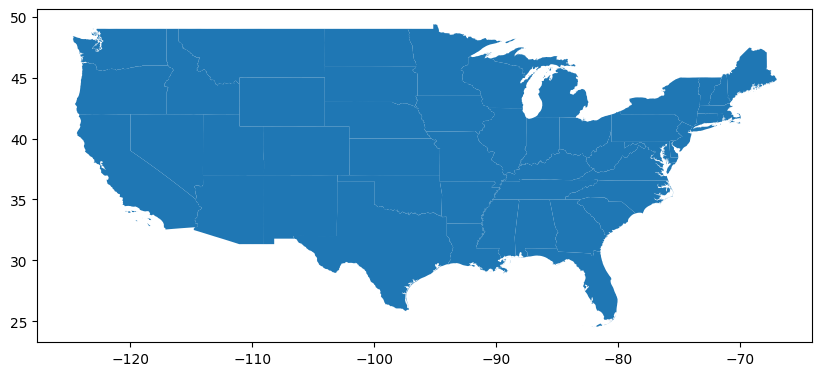

In [ ]:
bbox = states.cx[minx:maxx, miny:maxy]

bbox.plot(figsize=(10, 10))
plt.show()

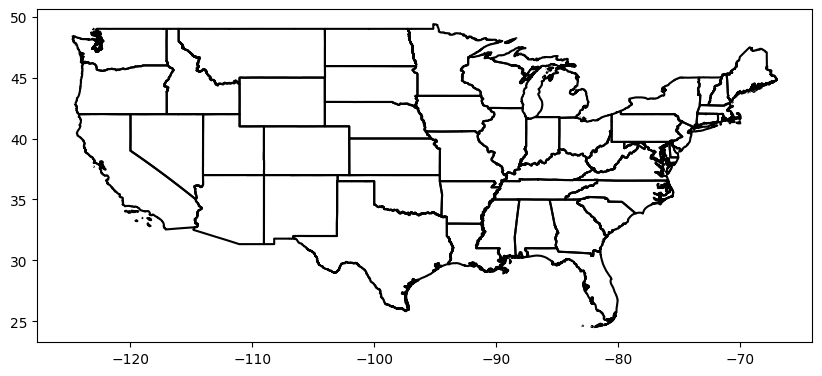

In [ ]:
us_map=bbox.boundary.plot(figsize=(10,10),color="black") #base map
plt.show()

**All of the above code serves to set up the base map of the continental United States**

In [ ]:
voters.groupby("NAME")["registered_voters"].mean().sort_values(ascending=False)

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125
Illinois,56840.375
North Carolina,56040.800
Georgia,36604.125
Arizona,35311.500
Virginia,24845.200
Maryland,22133.500


The above data shows the mean number of new registered voters per state, with California having the most, and Delaware having the least.

In [ ]:
average_voters=voters.groupby("NAME")["registered_voters"].mean()

In [ ]:
average_voters.head(12)

,registered_voters
NAME,
Arizona,35311.500
California,144545.375
Colorado,20527.500
Delaware,3166.375
District of Columbia,3248.400
Florida,65868.125
Georgia,36604.125
Illinois,56840.375
Maryland,22133.500


In [ ]:
state_voters= bbox.merge(average_voters, on="NAME", how="inner")

In [ ]:
state_voters.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   STATEFP            12 non-null     object  
 1   STATENS            12 non-null     object  
 2   AFFGEOID           12 non-null     object  
 3   GEOID              12 non-null     object  
 4   STUSPS             12 non-null     object  
 5   NAME               12 non-null     object  
 6   LSAD               12 non-null     object  
 7   ALAND              12 non-null     int64   
 8   AWATER             12 non-null     int64   
 9   geometry           12 non-null     geometry
 10  registered_voters  12 non-null     float64 
dtypes: float64(1), geometry(1), int64(2), object(7)
memory usage: 1.2+ KB


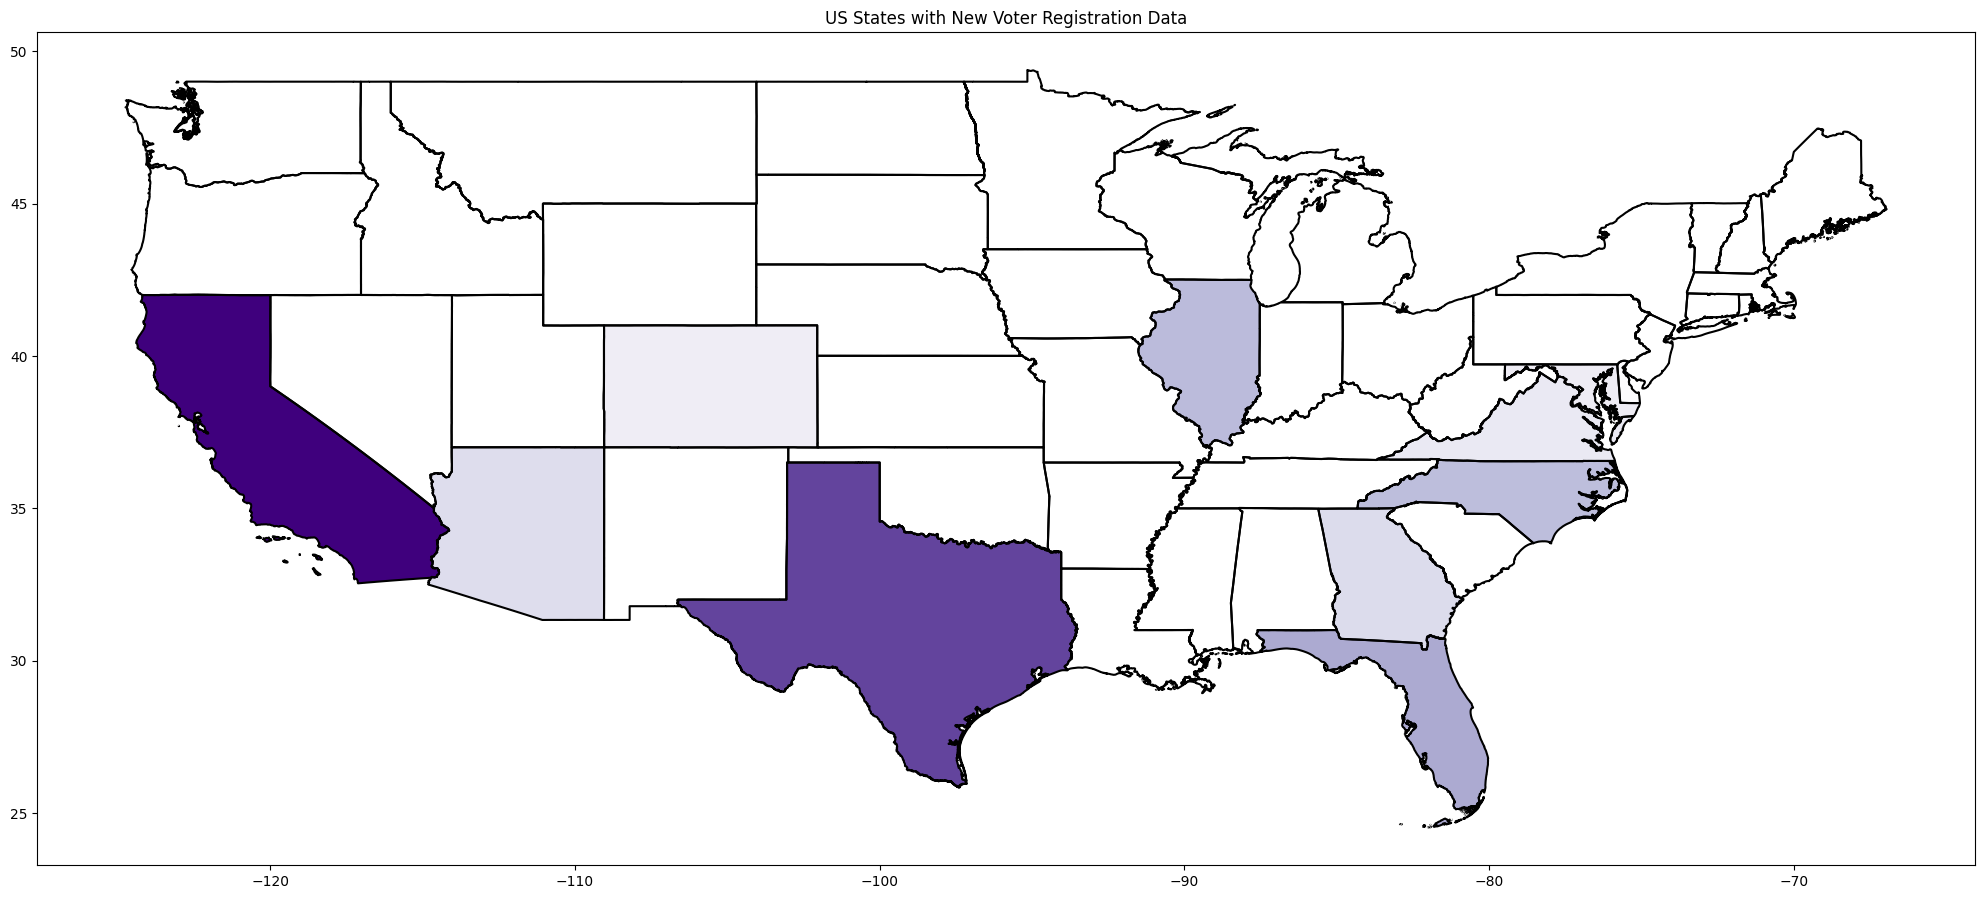

In [ ]:
us_map=bbox.boundary.plot(figsize=(25,15),color="black") #base map
state_voters.plot(ax=us_map,linewidth=.25, column="registered_voters",cmap="Purples")
plt.title("US States with New Voter Registration Data")
plt.show()

# Conclusions

From this data, despite the limited number of US states and territories available, we can begin to see a clear drop off in new voter registrations in April and May of 2020, most likely due to the lockdowns that came out of the COVID-19 Pandemic. This is very apparent in the available data for the District of Columbia, with the voter registrations dropping by over 3000 between April of 2016 and 2020, and 4000 between May of 2016 and 2020. A similar trend can be seen throughout all the available data, although the reason for the steep drop off cannot be determined with certainty without much more data.

If this data were to be used for determining the most optimal time to push advertisements for candidates, I would suggest taking the 2020 new voter registration data with a heavy grain of salt, as there were extenuating circumastances: the COVID-19 pandemic. If the client was interested in publishing voter registration guides on the internet, I would recommend publishing a guide in January or February of the year to maximize engagement, although again the available data is very limited and only covers the first half of the calendar year, and voter registration leading up to November is much more likely to be the highest of the whole year. Ultimately, the best suggestion for the client regardless of their goal would be to acquire more data to gain a deeper insight.

With regards to what additional data would need to be gathered, it would be encouraged to try to acquire data for all 50 states, across all 12 months, and include either population data or a pre-calculated voter registrations per capita. After this data is acquired, more valid conclusions could be reached about voter registration. Adding the data for the remaining months of the year could be incredibly insightful, as one would be able to see the lasting impacts of COVID-19 in 2020 registrations, and more general trends that carry over year to year.

# Academic Integrity Statement


By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

Emile Rebillard